In [1]:
# from mylab import *
# from deepar.dataset.time_series import MockTs
# from deepar.dataset.time_series import TimeSeries
# from deepar.dataset.time_series import NasaTs
# from deepar.model.lstm import DeepAR
import math

%matplotlib inline
from numpy.random import normal
import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# read series 

(200,)


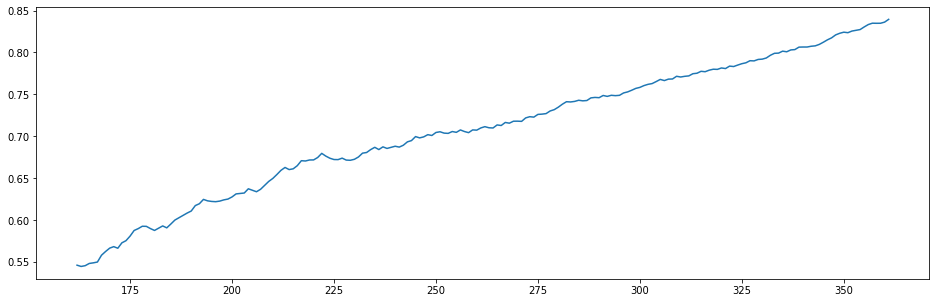

In [2]:
# read series
SIMULATE = False
OFFSET = 1.8
col = "down_collectorEmitterVoltage_llr"
# col = "down_gateEmitterVoltage_llr"
# OFFSET = 9  # for max
start = 100
end = 300

if SIMULATE:
    # simulate data
    l = []
    for i in range(400):
        y = 1.005**i+np.random.standard_normal()*0.1
        l.append(y) 
    s = pd.Series(l)
    
else:
    train_df = pd.read_csv("./temp/feature_filter_df.csv")
    end = train_df.shape[0]
    start = end -200
    s = train_df[col][start:end]
#     s = s - OFFSET

print(s.shape)
plt.figure(figsize = (16,5))
plt.plot(s)

# train

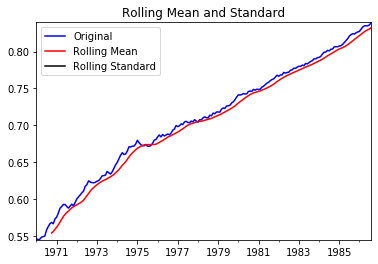

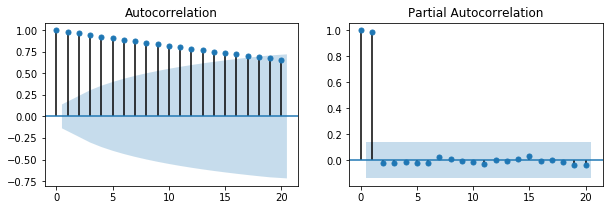

Test Statistic                  -2.170544
p-value                          0.217110
#Lags Used                       0.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Value (10%)            -2.574572
dtype: float64

In [3]:
from mylab.myteststationary import *

# ts = train_df.reduce_23 
# ts = ts.rolling(window=12).mean().dropna()
s.index = pd.DatetimeIndex(start=0,periods=len(s.values),freq='MS')
# ts_log = np.log(ts)
draw_trend(s, 10)
draw_acf_pacf(s,20)
test_stationarity(s)

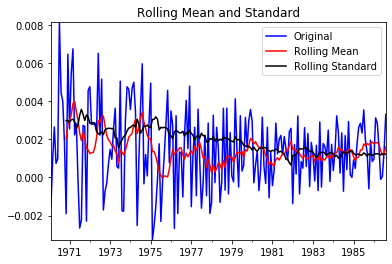

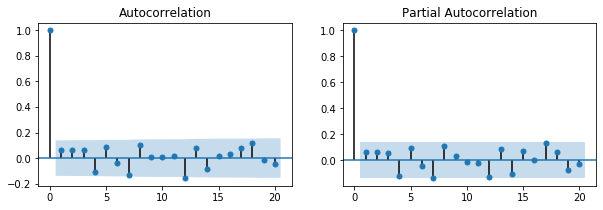

Test Statistic                -1.313874e+01
p-value                        1.443967e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.980000e+02
Critical Value (1%)           -3.463815e+00
Critical Value (5%)           -2.876251e+00
Critical Value (10%)          -2.574611e+00
dtype: float64

In [4]:
diff_1 = s.diff(1)
diff_1.dropna(inplace=True)
draw_trend(diff_1, 10)
draw_acf_pacf(diff_1,20)
test_stationarity(diff_1)

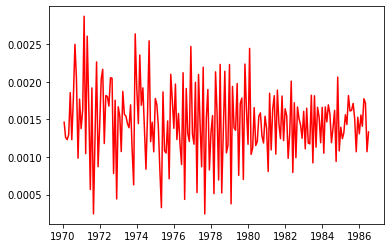

In [31]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(s[0:size+t], order=(4,1,2))
model_ARIMA = model.fit(disp = -1)
plt.plot(model_ARIMA.fittedvalues, color='red')

D:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.000


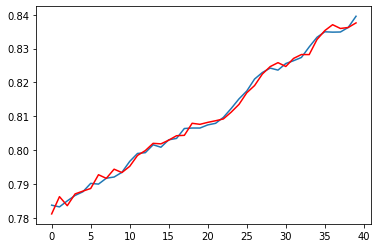

In [32]:
from sklearn.metrics import mean_squared_error


X = s
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
predictions = list()
for t in range(len(test)):
    train = s[0:size+t]
    model = ARIMA(train, order=(4,1,2))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    obs = test[t]
#     print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test.values)
plt.plot(predictions, color='red')
plt.show()

D:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.000


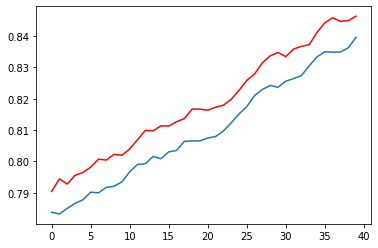

In [35]:
from sklearn.metrics import mean_squared_error


X = s
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
predictions = list()
for t in range(len(test)):
    train = s[0:size+t]
    model = ARIMA(train, order=(4,1,2))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast(steps = 7)
    yhat = output[0][-1]
    predictions.append(yhat)
    obs = test[t]
#     print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test.values)
plt.plot(predictions, color='red')
plt.show()

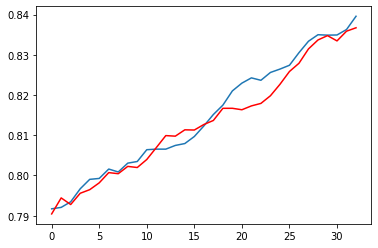

In [36]:
# plot
plt.plot(test.values[7:])
plt.plot(predictions[:-7], color='red')
plt.show()